# Comparing FHMM and CO

## Downloading data

In [6]:
import numpy as np
import pandas as pd
from os.path import join

from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
rcParams['figure.figsize'] = (13, 6)
plt.style.use('ggplot')
import nilmtk
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.disaggregate import CombinatorialOptimisation, fhmm_exact
from nilmtk.utils import print_dict
from nilmtk.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

The full data set can be downloaded from the remote WikiEnergy database. The credentials are omitted here for security reasons.

In [2]:
# download_wikienergy(database_username, database_password, hdf_filename)

## Loading data

In [17]:
data_dir = '/Users/nipunbatra/Downloads/'
we = DataSet('/home/shifona/Downloads/mini_project/REDD/redd.h5')
print('loaded ' + str(len(we.buildings)) + ' buildings')

loaded 6 buildings


In [18]:
building_number = 2
print_dict(we.buildings[building_number].metadata)

## Examine sub-metered appliances

In [19]:
elec = we.buildings[building_number].elec
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=2, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=2, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=3, building=2, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=4, building=2, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=5, building=2, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(instance=6, building=2, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=7, building=2, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=8, building=2, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=2, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=10, building=2, dataset='REDD', appliances=[Appliance(type='dis

## Wiring hierarchy of meters

In [12]:
elec.draw_wiring_graph();

ImportError: pydot could not be loaded: http://code.google.com/p/pydot/

## Plot sub-metered data for a single day

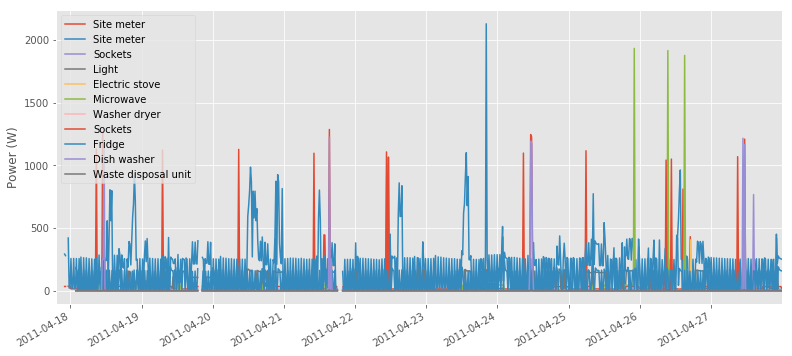

In [22]:
we.set_window(start='2011-04-17 00:00:00', end='2011-04-28 00:00:00')
elec.plot();

#### Good sections

In [23]:
elec.mains().good_sections()

[TimeFrame(start='2011-04-17 19:18:27-04:00', end='2011-04-17 19:22:04-04:00', empty=False),
 TimeFrame(start='2011-04-17 19:25:09-04:00', end='2011-04-17 19:26:14-04:00', empty=False),
 TimeFrame(start='2011-04-17 21:45:01-04:00', end='2011-04-17 21:45:25-04:00', empty=False),
 TimeFrame(start='2011-04-17 22:18:13-04:00', end='2011-04-17 22:18:26-04:00', empty=False),
 TimeFrame(start='2011-04-17 23:09:35-04:00', end='2011-04-17 23:09:43-04:00', empty=False),
 TimeFrame(start='2011-04-17 23:15:29-04:00', end='2011-04-17 23:15:37-04:00', empty=False),
 TimeFrame(start='2011-04-17 23:30:57-04:00', end='2011-04-17 23:31:21-04:00', empty=False),
 TimeFrame(start='2011-04-17 23:42:54-04:00', end='2011-04-17 23:43:03-04:00', empty=False),
 TimeFrame(start='2011-04-18 00:00:53-04:00', end='2011-04-18 00:01:02-04:00', empty=False),
 TimeFrame(start='2011-04-18 00:09:34-04:00', end='2011-04-18 01:21:53-04:00', empty=False),
 TimeFrame(start='2011-04-18 01:22:41-04:00', end='2011-04-18 01:29:10

## Training and disaggregation

#### CO

In [27]:
# Train
co = CombinatorialOptimisation()
co.train(elec)
co.model

Training model for submeter 'ElecMeter(instance=3, building=2, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])'
Training model for submeter 'ElecMeter(instance=4, building=2, dataset='REDD', appliances=[Appliance(type='light', instance=1)])'
Training model for submeter 'ElecMeter(instance=5, building=2, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])'
Training model for submeter 'ElecMeter(instance=6, building=2, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])'
Training model for submeter 'ElecMeter(instance=7, building=2, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])'
Training model for submeter 'ElecMeter(instance=8, building=2, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])'
Training model for submeter 'ElecMeter(instance=9, building=2, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])'
Training model for submeter 'ElecMeter(instance=10, building=2, d

[{'states': array([  0,  14, 777], dtype=int32),
  'training_metadata': ElecMeter(instance=3, building=2, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])},
 {'states': array([  0,  27, 148], dtype=int32),
  'training_metadata': ElecMeter(instance=4, building=2, dataset='REDD', appliances=[Appliance(type='light', instance=1)])},
 {'states': array([  0,  39, 406], dtype=int32),
  'training_metadata': ElecMeter(instance=5, building=2, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])},
 {'states': array([   0,   45, 1853], dtype=int32),
  'training_metadata': ElecMeter(instance=6, building=2, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])},
 {'states': array([0], dtype=int32),
  'training_metadata': ElecMeter(instance=7, building=2, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])},
 {'states': array([   0,  271, 1057], dtype=int32),
  'training_metadata': ElecMeter(instance=8, building=2, dataset=

In [32]:
print elec
output.close()

MeterGroup(meters=
  ElecMeter(instance=1, building=2, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=2, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=3, building=2, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=4, building=2, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=5, building=2, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(instance=6, building=2, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=7, building=2, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=8, building=2, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=2, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=10, building=2, dataset='REDD', appliances=[Appliance(type='dis

In [40]:
load_kwargs = co._pre_disaggregation_checks()
load_kwargs.setdefault('sample_period', 60)
load_kwargs.setdefault('sections', mains.good_sections())

for c in  elec.mains().power_series(**load_kwargs):
    print c

TypeError: _pre_disaggregation_checks() takes exactly 2 arguments (1 given)

In [33]:
# Disaggregate

disag_filename = '/home/shifona/Downloads/mini_project/REDD/redd2.h5'
output = HDFDataStore(disag_filename, 'w')
co.disaggregate(elec.mains(), output)
output.close()

Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.


KeyError: 0

#### FHMM

In [11]:
%%capture
# Train
fhmm = fhmm_exact.FHMM()
fhmm.train(elec)
# Disaggregate
disag_filename = join(data_dir, 'wikienergy-disag-fhmm.h5')
output = HDFDataStore(disag_filename, 'w')
fhmm.disaggregate(elec.mains(), output)
output.close()

## Examine disaggregated data

#### CO

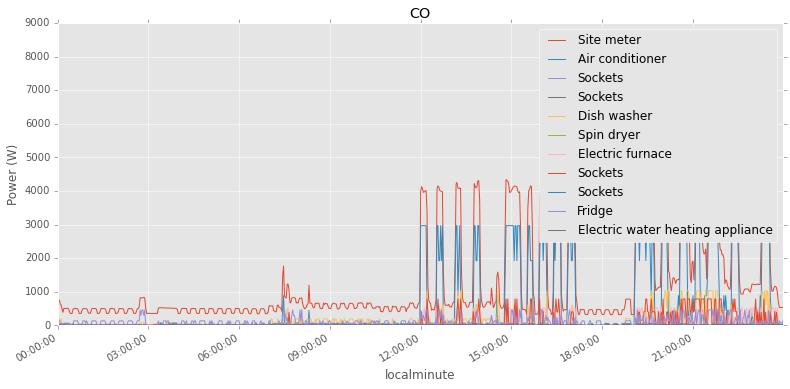

In [12]:
disag_filename = join(data_dir, 'wikienergy-disag-co.h5')
disag = DataSet(disag_filename)
disag_elec = disag.buildings[building_number].elec
disag_elec.plot()
disag.store.close()
plt.title("CO");

## Calculate accuracy of disaggregation

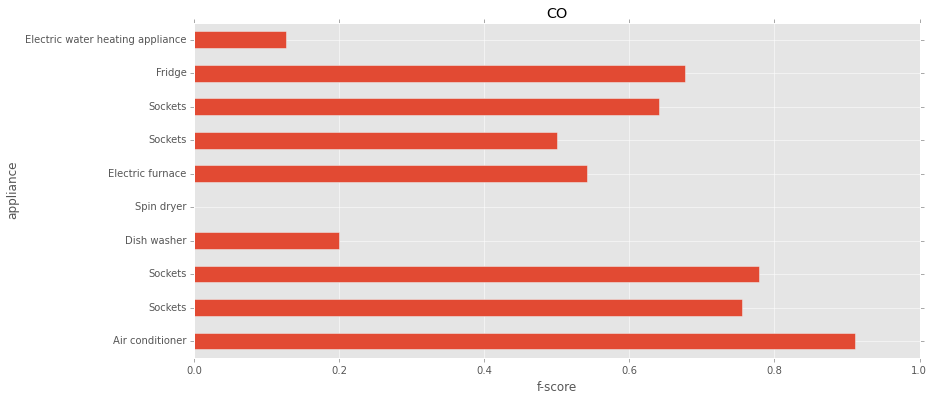

In [13]:
disag = DataSet(disag_filename)
disag_elec = disag.buildings[building_number].elec

f1 = f1_score(disag_elec, elec)
f1.index = disag_elec.get_labels(f1.index)
f1.plot(kind='barh')
plt.ylabel('appliance');
plt.xlabel('f-score');
plt.title("CO");

disag.store.close()

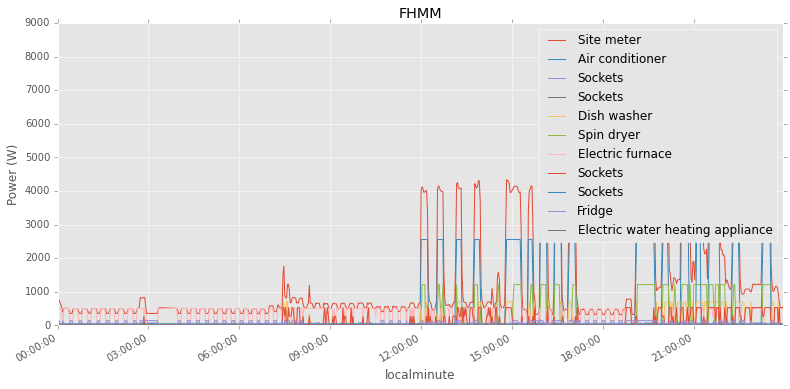

In [14]:
disag_filename = join(data_dir, 'wikienergy-disag-fhmm.h5')
disag = DataSet(disag_filename)
disag_elec = disag.buildings[building_number].elec
disag_elec.plot()
plt.title("FHMM");
disag.store.close()

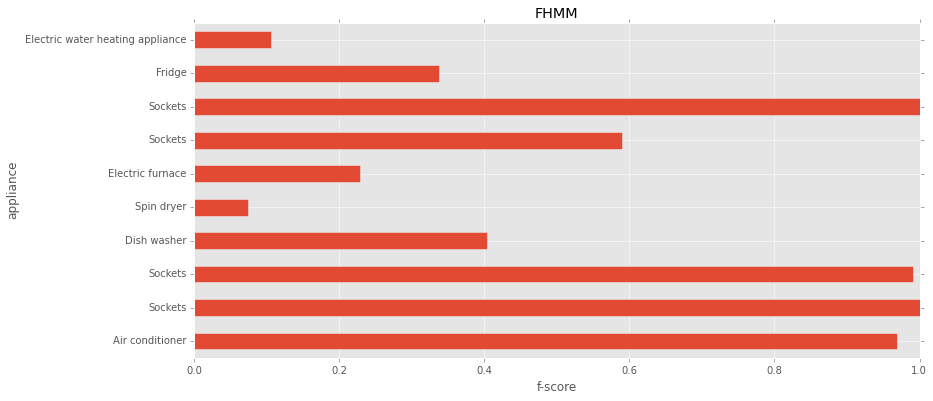

In [15]:
disag = DataSet(disag_filename)
disag_elec = disag.buildings[building_number].elec

f1 = f1_score(disag_elec, elec)
f1.index = disag_elec.get_labels(f1.index)
f1.plot(kind='barh')
plt.ylabel('appliance');
plt.xlabel('f-score');
plt.title("FHMM");

disag.store.close()

In [17]:
# CSS styling
from IPython.core.display import display, HTML
display(HTML(open('static/styles.css', 'r').read()));